In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('../Data/AQI and Lat Long of Countries_cleaned.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,2,1,1,36,1,0,1,51,2,44.7444,44.2031
1,Brazil,Presidente Dutra,41,1,1,1,5,1,1,1,41,1,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,1,1,1,5,1,1,1,41,1,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,2,1,1,39,1,2,1,66,2,37.1667,15.1833
4,Poland,Przasnysz,34,1,1,1,34,1,0,1,20,1,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,2,1,1,34,1,5,1,54,2,37.5516,-77.3285
16691,Slovakia,Martin,71,2,1,1,39,1,1,1,71,2,49.0650,18.9219
16692,Slovakia,Martin,71,2,1,1,39,1,1,1,71,2,36.3385,-88.8513
16693,France,Sceaux,50,1,1,1,20,1,5,1,50,1,48.7786,2.2906


In [14]:
df_numericals = df.select_dtypes(include=[np.number])
corr = df_numericals.corr()
corr

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
AQI Value,1.000000,0.783175,0.458523,0.138312,0.327956,0.388830,0.308858,0.163978,0.980360,0.775491,-0.099554,0.150662
AQI Category,0.783175,1.000000,0.323705,0.057815,0.193874,0.327369,0.332740,0.077183,0.786304,0.974282,-0.116107,0.082521
CO AQI Value,0.458523,0.323705,1.000000,0.767321,0.039752,0.119223,0.399566,0.513098,0.458846,0.324524,-0.076412,0.002410
CO AQI Category,0.138312,0.057815,0.767321,1.000000,-0.009876,0.003321,0.110630,0.516731,0.137666,0.057073,0.001386,-0.010529
Ozone AQI Value,0.327956,0.193874,0.039752,-0.009876,1.000000,0.772789,-0.251169,-0.029685,0.233031,0.165374,0.249740,0.318965
Ozone AQI Category,0.388830,0.327369,0.119223,0.003321,0.772789,1.000000,-0.062844,-0.005790,0.321055,0.258983,0.013890,0.231598
NO2 AQI Value,0.308858,0.332740,0.399566,0.110630,-0.251169,-0.062844,1.000000,0.247692,0.341455,0.342129,0.040666,-0.290813
NO2 AQI Category,0.163978,0.077183,0.513098,0.516731,-0.029685,-0.005790,0.247692,1.000000,0.165100,0.077770,-0.007744,0.019186
PM2.5 AQI Value,0.980360,0.786304,0.458846,0.137666,0.233031,0.321055,0.341455,0.165100,1.000000,0.791926,-0.125997,0.113621
PM2.5 AQI Category,0.775491,0.974282,0.324524,0.057073,0.165374,0.258983,0.342129,0.077770,0.791926,1.000000,-0.119965,0.074021


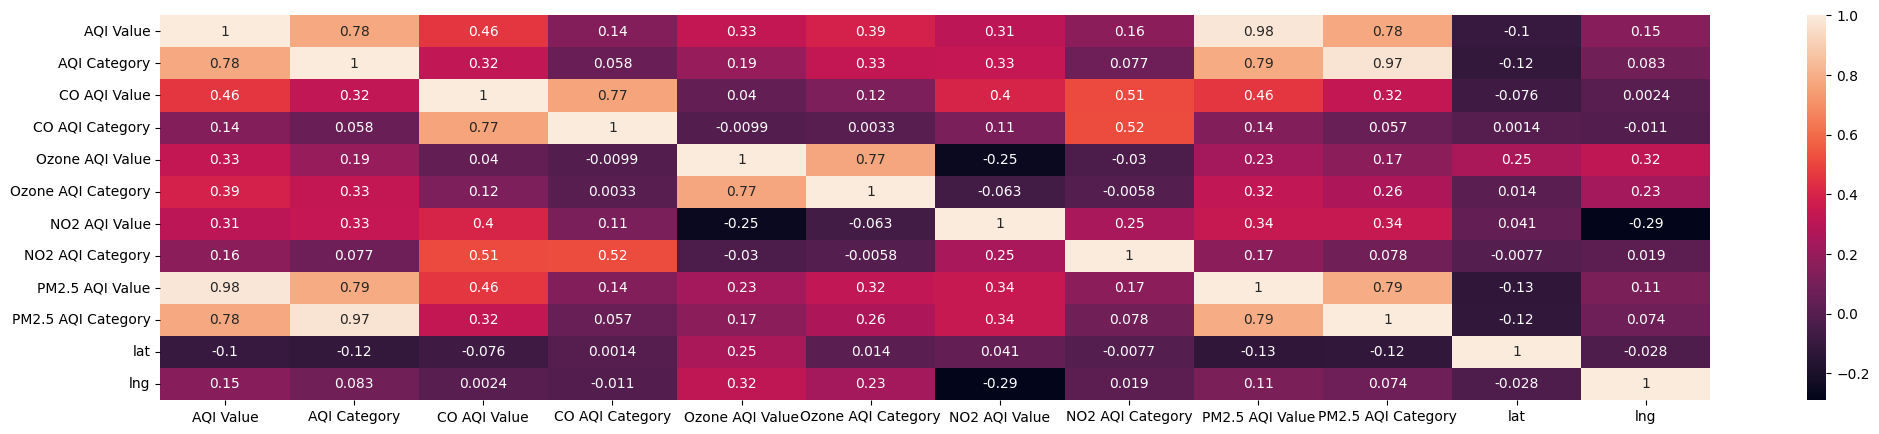

In [18]:
sns.heatmap(corr, annot=True)
plt.rcParams['figure.figsize'] = (25,7)
plt.show()

In [21]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numericals),columns=df_numericals.columns)


In [22]:
x = df_scaled.drop(columns = ['AQI Value'])
y = df_scaled['AQI Value']

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(x,y)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)

In [26]:
selected_features_rfe = x.columns[rfe.support_]
selected_features_rfe

Index(['AQI Category', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value',
       'lat'],
      dtype='object')